# Certificate in Data Science | Assignment 7 |  
- Parkinson PCR

> University of Washington  
> September 2019  
> N. HICKS

## Description

Perform Principal Component Regression on a <a href="https://archive.ics.uci.edu/ml/datasets/parkinsons+telemonitoring">dataset that tracked patients with Parkinson's Disease</a>.

Citation: A Tsanas, MA Little, PE McSharry, LO Ramig (2009)
'Accurate telemonitoring of Parkinson's disease progression by non-invasive speech tests',
IEEE Transactions on Biomedical Engineering.

About the data:
This dataset is composed of a range of biomedical voice measurements from 42 people with early-stage Parkinson's disease recruited to a six-month trial of a telemonitoring device for remote symptom progression monitoring. The recordings were automatically captured in the patient's homes.

## Instructions

 1. Load the dataset.
 2. Create the X-matrix (one-hot encoding categorical factors).
 3. Scale the X-matrix.
 4. Create the principal components and do a simple plot of the explained variance.
 5. PCR - Linear regression with the principal components.

Report on:

 1. Number of components before and after (choose a smaller number of principal components and explain how you chose them).
 2. Interpret the adjusted R-squared.

## Code Execution

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import seaborn as sns

In [2]:
# establish the base file path and name
filename = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/telemonitoring/parkinsons_updrs.data"

In [3]:
# initiate the plots
%matplotlib inline
sns.set()

In [4]:
parkinsons_df = pd.read_csv(filename)
parkinsons_df.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [5]:
parkinsons_df.columns

Index(['subject#', 'age', 'sex', 'test_time', 'motor_UPDRS', 'total_UPDRS',
       'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP',
       'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object')

In [6]:
parkinsons_df.describe()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,...,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,21.494128,64.804936,0.317787,92.863722,21.296229,29.018942,0.006154,0.000044,0.002987,0.003277,...,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,12.372279,8.821524,0.465656,53.445602,8.129282,10.700283,0.005624,0.000036,0.003124,0.003732,...,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,1.000000,36.000000,0.000000,-4.262500,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,...,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,10.000000,58.000000,0.000000,46.847500,15.000000,21.371000,0.003580,0.000022,0.001580,0.001820,...,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,22.000000,65.000000,0.000000,91.523000,20.871000,27.576000,0.004900,0.000035,0.002250,0.002490,...,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,33.000000,72.000000,1.000000,138.445000,27.596500,36.399000,0.006800,0.000053,0.003290,0.003460,...,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,42.000000,85.000000,1.000000,215.490000,39.511000,54.992000,0.099990,0.000446,0.057540,0.069560,...,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


In [7]:
# check if the source dataframe contains OBJECT or CATEGORY data types
# validtadates requirement to one-hot-encode the features matrix or not
parkinsons_df.dtypes

subject#           int64
age                int64
sex                int64
test_time        float64
motor_UPDRS      float64
total_UPDRS      float64
Jitter(%)        float64
Jitter(Abs)      float64
Jitter:RAP       float64
Jitter:PPQ5      float64
Jitter:DDP       float64
Shimmer          float64
Shimmer(dB)      float64
Shimmer:APQ3     float64
Shimmer:APQ5     float64
Shimmer:APQ11    float64
Shimmer:DDA      float64
NHR              float64
HNR              float64
RPDE             float64
DFA              float64
PPE              float64
dtype: object

In [8]:
# Define the target and features:
target_label = 'total_UPDRS'
non_features = ['subject#', 'age', 'sex', 'test_time', 'motor_UPDRS']
feature_labels = [x for x in parkinsons_df.columns if x not in [target_label] + non_features]

# Filter out non-features and non-targets
parkinsons_df = parkinsons_df.drop(non_features, axis=1)

# One-hot encode inputs
# although, no OBJECT dtypes exist.
parkinsons_expanded = pd.get_dummies(parkinsons_df, drop_first=True)
print('DataFrame original shape:         {}'.format(parkinsons_df.shape))
print('DataFrame one-hot-expanded shape: {}\n'.format(parkinsons_expanded.shape))
print(parkinsons_expanded.describe())

DataFrame original shape:         (5875, 17)
DataFrame one-hot-expanded shape: (5875, 17)

       total_UPDRS    Jitter(%)  Jitter(Abs)   Jitter:RAP  Jitter:PPQ5  \
count  5875.000000  5875.000000  5875.000000  5875.000000  5875.000000   
mean     29.018942     0.006154     0.000044     0.002987     0.003277   
std      10.700283     0.005624     0.000036     0.003124     0.003732   
min       7.000000     0.000830     0.000002     0.000330     0.000430   
25%      21.371000     0.003580     0.000022     0.001580     0.001820   
50%      27.576000     0.004900     0.000035     0.002250     0.002490   
75%      36.399000     0.006800     0.000053     0.003290     0.003460   
max      54.992000     0.099990     0.000446     0.057540     0.069560   

        Jitter:DDP      Shimmer  Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  \
count  5875.000000  5875.000000  5875.000000   5875.000000   5875.000000   
mean      0.008962     0.034035     0.310960      0.017156      0.020144   
std       0.00

In [9]:
# Get target and originate the x-matrix
y = parkinsons_df[target_label]
# X = parkinsons_df.as_matrix(columns=feature_labels)
X = parkinsons_df[feature_labels].values

In [10]:
# Scale function
def scale(col):
    mean_col = np.mean(col)
    sd_col = np.std(col)
    std = (col - mean_col) / sd_col
    return std

In [11]:
# Scale all columns first

# Create x-scaled (look into the function np.apply_along_axis
#    to apply 'scale' function to each column).
x_scaled = np.apply_along_axis(scale, 1, X)

# Create a scaled y-target.
y_scaled = scale(y)

In [12]:
# PCR!!
pca = PCA()   # PCA of the entire feature set
pca_result = pca.fit_transform(x_scaled)

column_names = ['pc' + str(ix+1) for ix in range(x_scaled.shape[1])]
pca_df = pd.DataFrame(data = pca_result, columns=column_names)
pca_df[target_label] = y_scaled

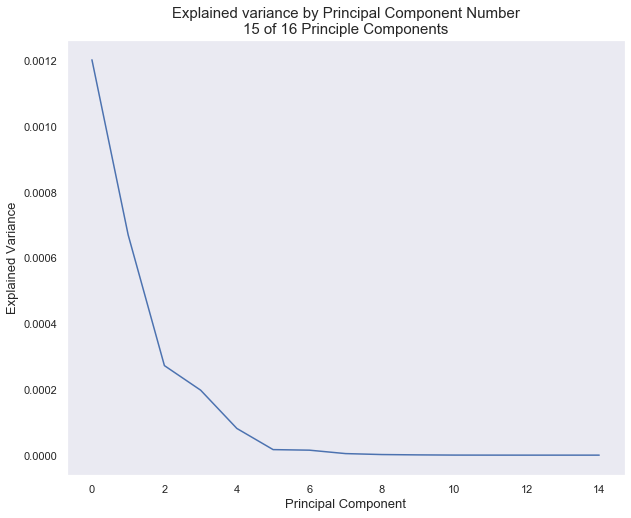

In [13]:
# Plot the explained variance for all principal components.
# Note: If the first value is too large, it may dwarf how the rest look.
# You may consider plotting starting with the 2nd value (python index at 1).

exp_var = pca.explained_variance_
len1 = len(exp_var)
exp_var = np.delete(exp_var, 0)
len2 = len(exp_var)
title_height = 13
plt.figure(figsize=(10, 8))
plt.plot(exp_var)
plt.grid()
plt.title('Explained variance by Principal Component Number\n{1} of {0} Principle Components'
          .format(len1, len2), fontsize=title_height+2)
plt.xlabel('Principal Component', fontsize=title_height)
plt.ylabel('Explained Variance', fontsize=title_height)
plt.show()

                            OLS Regression Results                            
Dep. Variable:            total_UPDRS   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     34.23
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           1.66e-15
Time:                        15:12:47   Log-Likelihood:                -8302.2
No. Observations:                5875   AIC:                         1.661e+04
Df Residuals:                    5872   BIC:                         1.663e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.992e-15      0.013  -3.85e-13      1.0

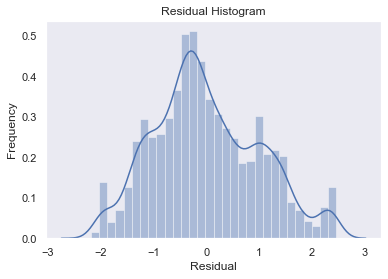

In [14]:
# Perform linear regression with the first N columns.
n = 2
formula_start = target_label + ' ~ '
formula_terms = ['pc' + str(x+1) for x in range(n)]
formula_end = ' + '.join(formula_terms)
formula_final = formula_start + formula_end

pcr_model = sm.ols(formula = formula_final, data=pca_df)

results = pcr_model.fit()

# Get most of the linear regression statistics we are interested in:
print(results.summary())

# Plot a histogram of the residuals
sns.distplot(results.resid, hist=True)
plt.grid()
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram')
plt.show()

## Summary of Results

### Question 1  
> Number of components before and after (choose a smaller number of principal components and explain how you chose them).


> - From evaluation of all `1 <= n <= 5` results above, the value `n = 2` is chosen as giving the best result, as it minimizes the adjusted R-squared value while providing enough information for a model basis.  
<br>
> - The histogram shows increased variance however, where outliers likely effect the distribution of underlying data.

### Question 2  
> Interpret the adjusted R-squared.

> - With `n = 2`, an adjusted R-squared value of 0.011 results, where the R-squared value is 0.012.  
<br>
> - Although these 2 results are nearly the same, a `delta = -0.001` is observed between them.  
<br>
> - Such a result indicates decreased performance of the model, due to the number of features used. This is true because R-squared is a measure of the residuals - the distance from the regression line (model) to the data points.  
<br>
> - There is also a large magnitude delta between `n = 5` and `n = 4` for both R-squared and adjusted R-squared. Also, at these `n` values, the residuals are largest, making this PCA result less effective as a useful model.